<a href="https://colab.research.google.com/github/maffant20/Assignment-5/blob/main/CNN_with_2conv_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

#Load Data
np.random.seed(6) #For reproducibility
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

#Dataset characteristics
print('Training Images Size: {}'.format(X_train.shape))
print(X_train[0].shape)

Training Images Size: (50000, 32, 32, 3)
(32, 32, 3)


In [15]:
print(X_train.shape)
print(Y_train.shape)


(50000, 32, 32, 3)
(50000, 1)


In [16]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
print(Y_train.shape)
print(Y_train[0])


(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [17]:
def plot_sam(X,Y,ide):

  plt.figure(figsize = (15,2))
  plt.imshow(X[ide])
  for i in range(10):
    if Y[ide][i]==1:
      cl = classes[i]
  plt.xlabel(cl)
  plt.show()

Training Loss and Accuracy
Epoch 1/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.6326 - accuracy: 0.3964
Epoch 2/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.2933 - accuracy: 0.5410
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.1240 - accuracy: 0.6070
Epoch 4/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.0092 - accuracy: 0.6507
Epoch 5/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.9158 - accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 117s 75ms/step - loss: 0.8290 - accuracy: 0.7155
Epoch 7/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7405 - accuracy: 0.7465
Epoch 8/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.6804 - accuracy: 0.7695
Epoch 9/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.6113 - accuracy: 0.7931
Epoch 10/10
1563/1563 [=====

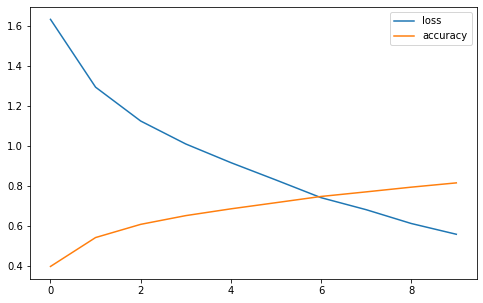

In [18]:

cnn = models.Sequential([layers.Conv2D(filters = 32, kernel_size= (3,3), activation = 'relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'),
                         layers.MaxPooling2D((2,2)),                         
                         layers.Flatten(),
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(400, activation = 'relu'),
                         layers.Dense(300, activation = 'relu'),
                         layers.Dense(200, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')
])
cnn.compile(tf.keras.optimizers.Adam(learning_rate = 0.003),
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])
print('Training Loss and Accuracy')
history =cnn.fit(X_train, Y_train, epochs = 10)
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

Softmax normalize probabilities

Already in 5 Epochs, the accuracy has jumped from 40% in ANN to 69% in CNN 

In [19]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.2736 - accuracy: 0.6324


[1.273608684539795, 0.6323999762535095]

63% accuracy. With more epochs and more layers, we can get more accuracy

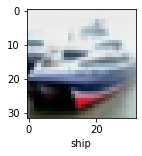

In [20]:
plot_sam(X_test,Y_test,1)

Let's use this model to predict it.

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
print(y_pred[:5])


313/313 [==============================] - 7s 21ms/step
[[7.3706330e-04 7.2202354e-04 1.2352638e-02 6.9830722e-01 2.4488961e-02
  1.7254476e-01 8.3269693e-02 5.2272915e-03 2.2478303e-04 2.1256178e-03]
 [1.7465194e-05 1.0426140e-05 1.9336914e-10 2.1788828e-13 5.9990831e-13
  2.9030563e-15 2.0543336e-09 6.7568706e-14 9.9997205e-01 1.4579506e-08]
 [5.2565832e-02 9.8595936e-03 2.5513230e-03 4.4944583e-04 4.5720482e-04
  7.5354415e-05 2.2258244e-03 1.4569241e-04 9.2919672e-01 2.4730193e-03]
 [5.6058764e-01 2.1633045e-04 1.0122653e-03 1.6006721e-04 9.8839053e-04
  1.4520747e-06 6.6190893e-05 5.1889951e-05 4.3081325e-01 6.1024972e-03]
 [1.3363434e-03 9.9355599e-04 1.8944721e-01 4.6217799e-02 3.8353693e-02
  1.8905681e-02 6.9684643e-01 8.8300713e-04 6.6160890e-03 4.0010360e-04]]


In [24]:
y_pred_classes = [np.argmax(element) for element in y_pred]
rounded_labels=np.argmax(Y_test, axis=1)
print(y_pred_classes[:20])
print(rounded_labels[:20])

[3, 8, 8, 0, 6, 6, 1, 6, 5, 1, 0, 9, 3, 7, 9, 8, 3, 7, 8, 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


Some errors from Y_test because of 63% accuracy and not 100%

In [25]:
print('classification Report: \n', classification_report(rounded_labels,y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      1000
           1       0.82      0.76      0.79      1000
           2       0.58      0.48      0.53      1000
           3       0.39      0.45      0.42      1000
           4       0.65      0.46      0.54      1000
           5       0.46      0.62      0.53      1000
           6       0.69      0.76      0.72      1000
           7       0.81      0.55      0.65      1000
           8       0.69      0.79      0.74      1000
           9       0.72      0.74      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.63     10000
weighted avg       0.65      0.63      0.63     10000

